This notebook was an investigation into the state of the ANES 2016 data. Because the ANES poll information includes many years of polling information, there are many previous questions that are no longer used. These columns are are NaNs. I used my heatmap trick to visualize where the NaNs were (though because this database is large, I had to run the command over and over on sets of 100 columns to generate heatmaps). After confirming the columns were full of only NaNs they were deleted. 

In [2]:
import pandas as pd
import numpy as np

data = pd.read_pickle('./pickles/anes_column_names_1.pkl')

In [25]:
data_2 = data[data['Year_of_Study_VCF0004']==2016]

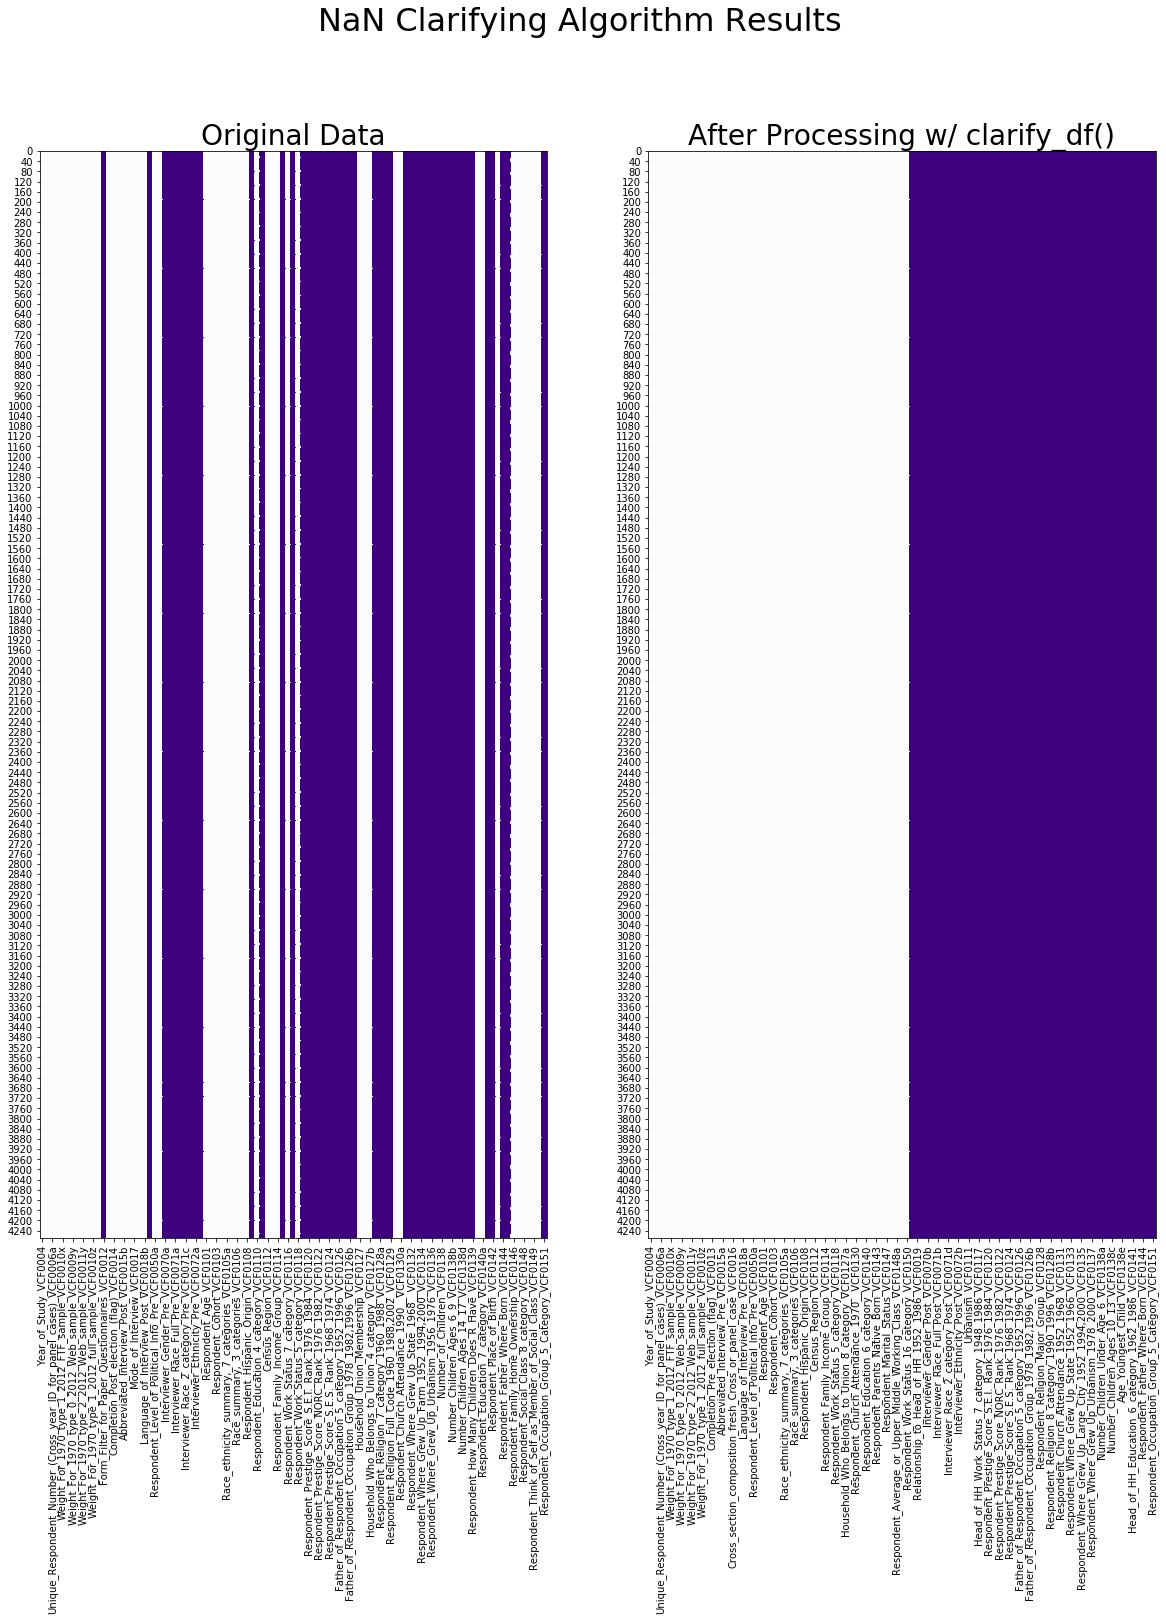

In [26]:
%matplotlib inline
import pandas as pd
import seaborn as sbn
from matplotlib import pyplot as plt
import numpy as np
import time

def clarify_df(df, heatmap=False):
    """
    clarify_df takes a dataframe and reogranizes the columns and rows so that the NaN values are most dense at the
    bottom and right sides of the dataframe. This allows easier selection of the area without NaN. 
    It returns the newly sorted df. 
    
    if keyword heatmap=True is passed, it will also print the original df (purple sites are NaN cells, and the 
    sorted cell df for comparison (it creates an output file called )
    """
    df2 = df.copy()
    df2 = df2.reset_index(drop=True)
    #print(df2)
    #print(df2.index, df2.shape)
    nan_col = [(c, df2[c].isna().sum()) for c in df2.columns]
    nan_col_sort = sorted(nan_col, key=lambda x : x[1], reverse=False)    
    col_order = [c[0] for c in nan_col_sort]
    #print(col_order)
    nan_row = [(int(r), df2.iloc[int(r)].isna().sum()) for r in df2.index]    
    nan_row_sort = sorted(nan_row, key=lambda x : x[1], reverse=False) 
    row_order = [r[0] for r in nan_row_sort]
    #print(row_order)
    extra_cols =[w for w in df2.columns if w not in col_order]    
    df3 = df2[extra_cols + col_order ]
    #print(df3)
    #print(row_order)
    extra_rows =[w for w in df3.index if int(w) not in row_order]
    df4 = df3.iloc[extra_rows + row_order ]
    #print(df4)
    if heatmap :
        mask1 = df2.isnull()
        f,(ax1,ax2) = plt.subplots(1,2, figsize=(20,20), sharey=False)
        f.suptitle("NaN Clarifying Algorithm Results", fontsize=32)
        ax1.set_title('Original Data', fontsize=28)
        sbn.heatmap(mask1.iloc[:,1:], vmin=0, vmax=10**-8, ax=ax1, cmap='Purples', cbar=False)
        mask2 = df4.isnull()
        sbn.heatmap(mask2.iloc[:,1:], vmin=0, vmax=10**-8, cmap='Purples', ax=ax2, cbar=False)
        ax2.set_title('After Processing w/ clarify_df()', fontsize=28)
        #ax2.title.set_text('First Iteration clarify_df()')  
        for _, spine in ax1.spines.items():
            spine.set_visible(True)
        for _, spine in ax2.spines.items():
            spine.set_visible(True)   
        #save plot
        import time
        timestr = time.strftime("%Y%m%d_%H%M%S")
        f.savefig( "./images/" + timestr + "_clarify.png")
        df4.to_pickle("./pickles/" + timestr + "_clarify.pkl")
        plt.show()
    return(df4)

iter_1 = clarify_df(data_2.iloc[:,:100], heatmap=True)

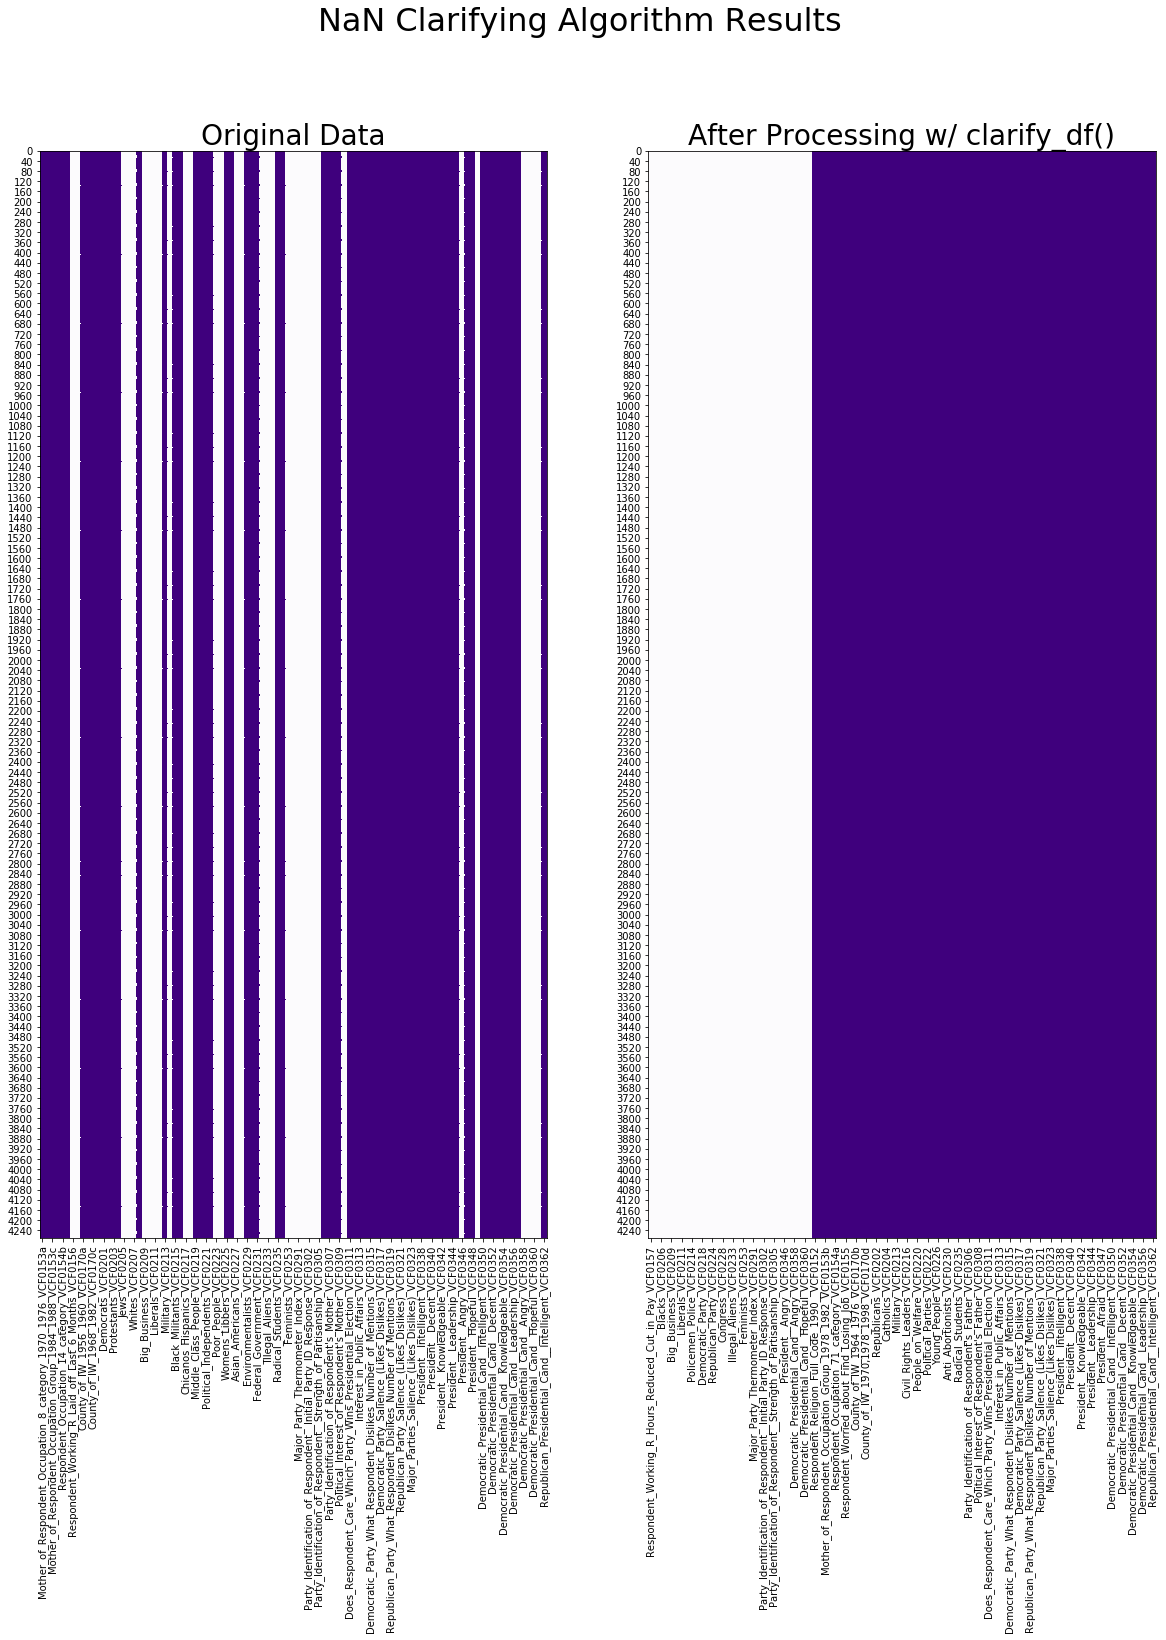

In [28]:
iter_2 = clarify_df(data_2.iloc[:,100:200], heatmap=True)

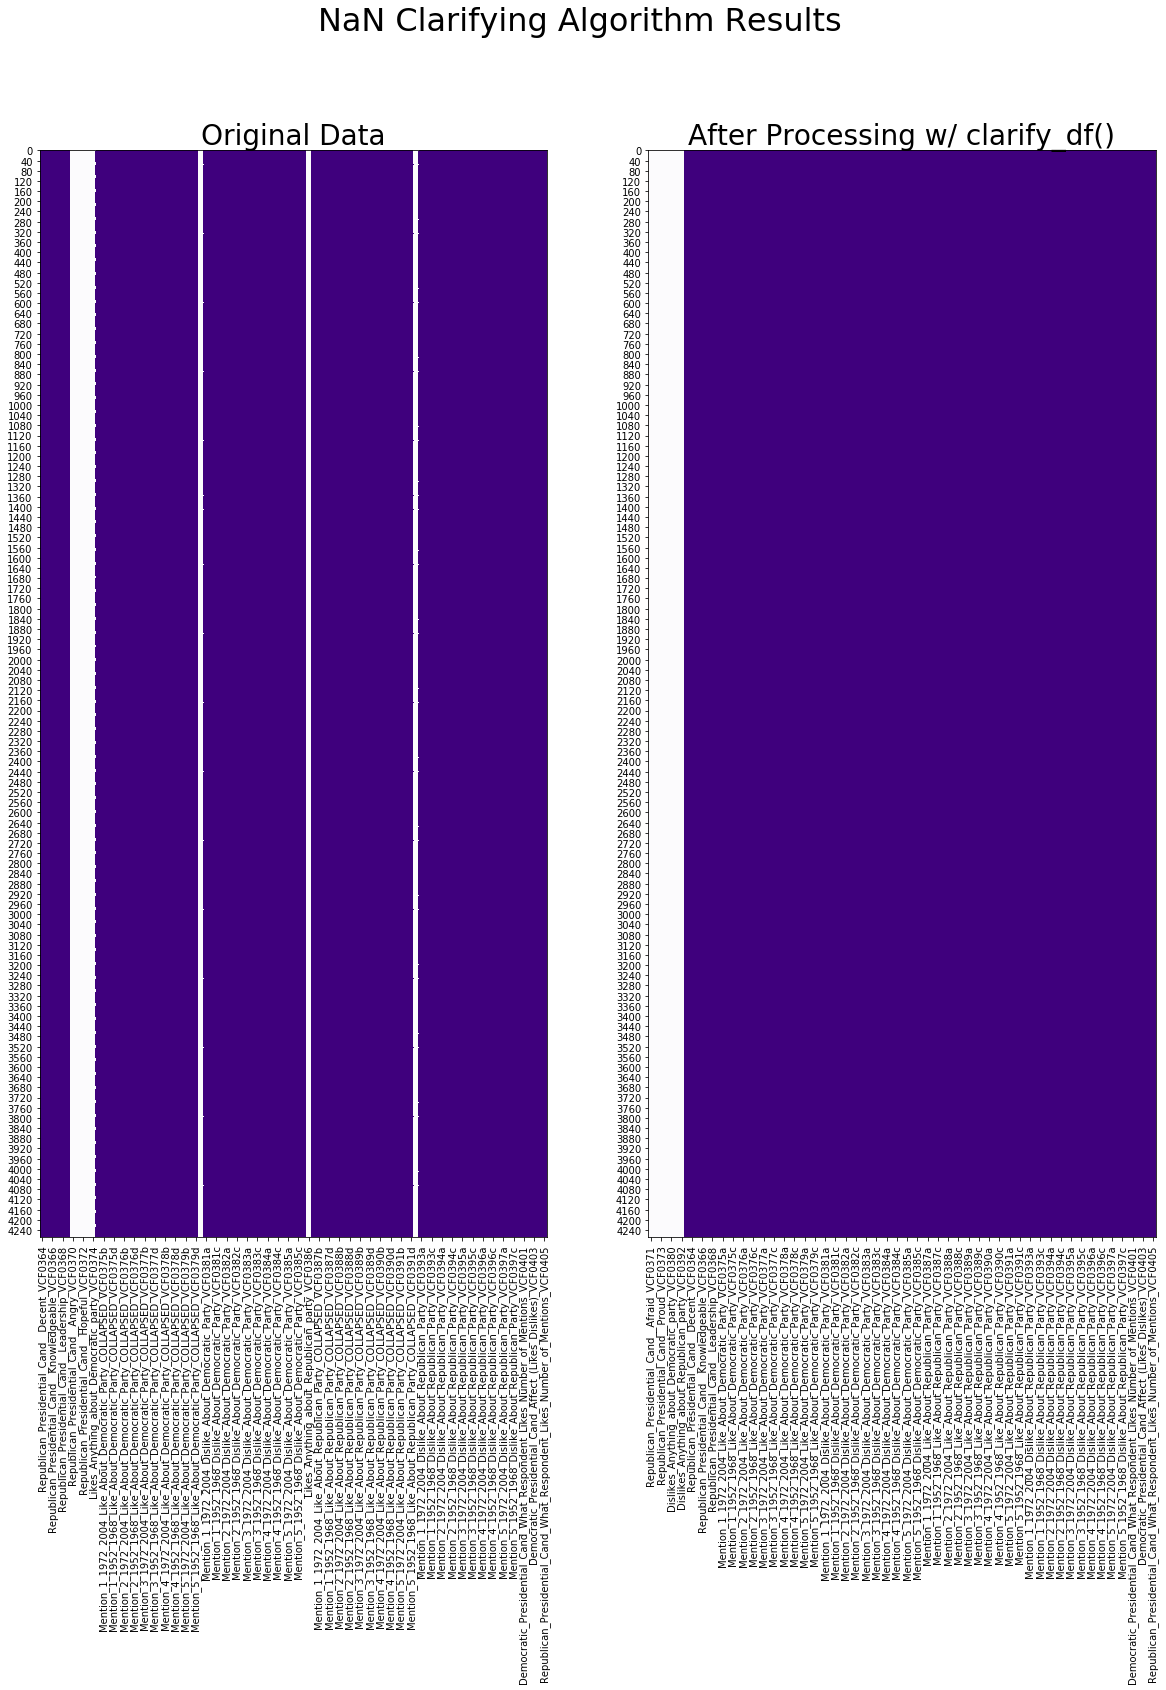

In [29]:
iter_3 = clarify_df(data_2.iloc[:,200:300], heatmap=True)

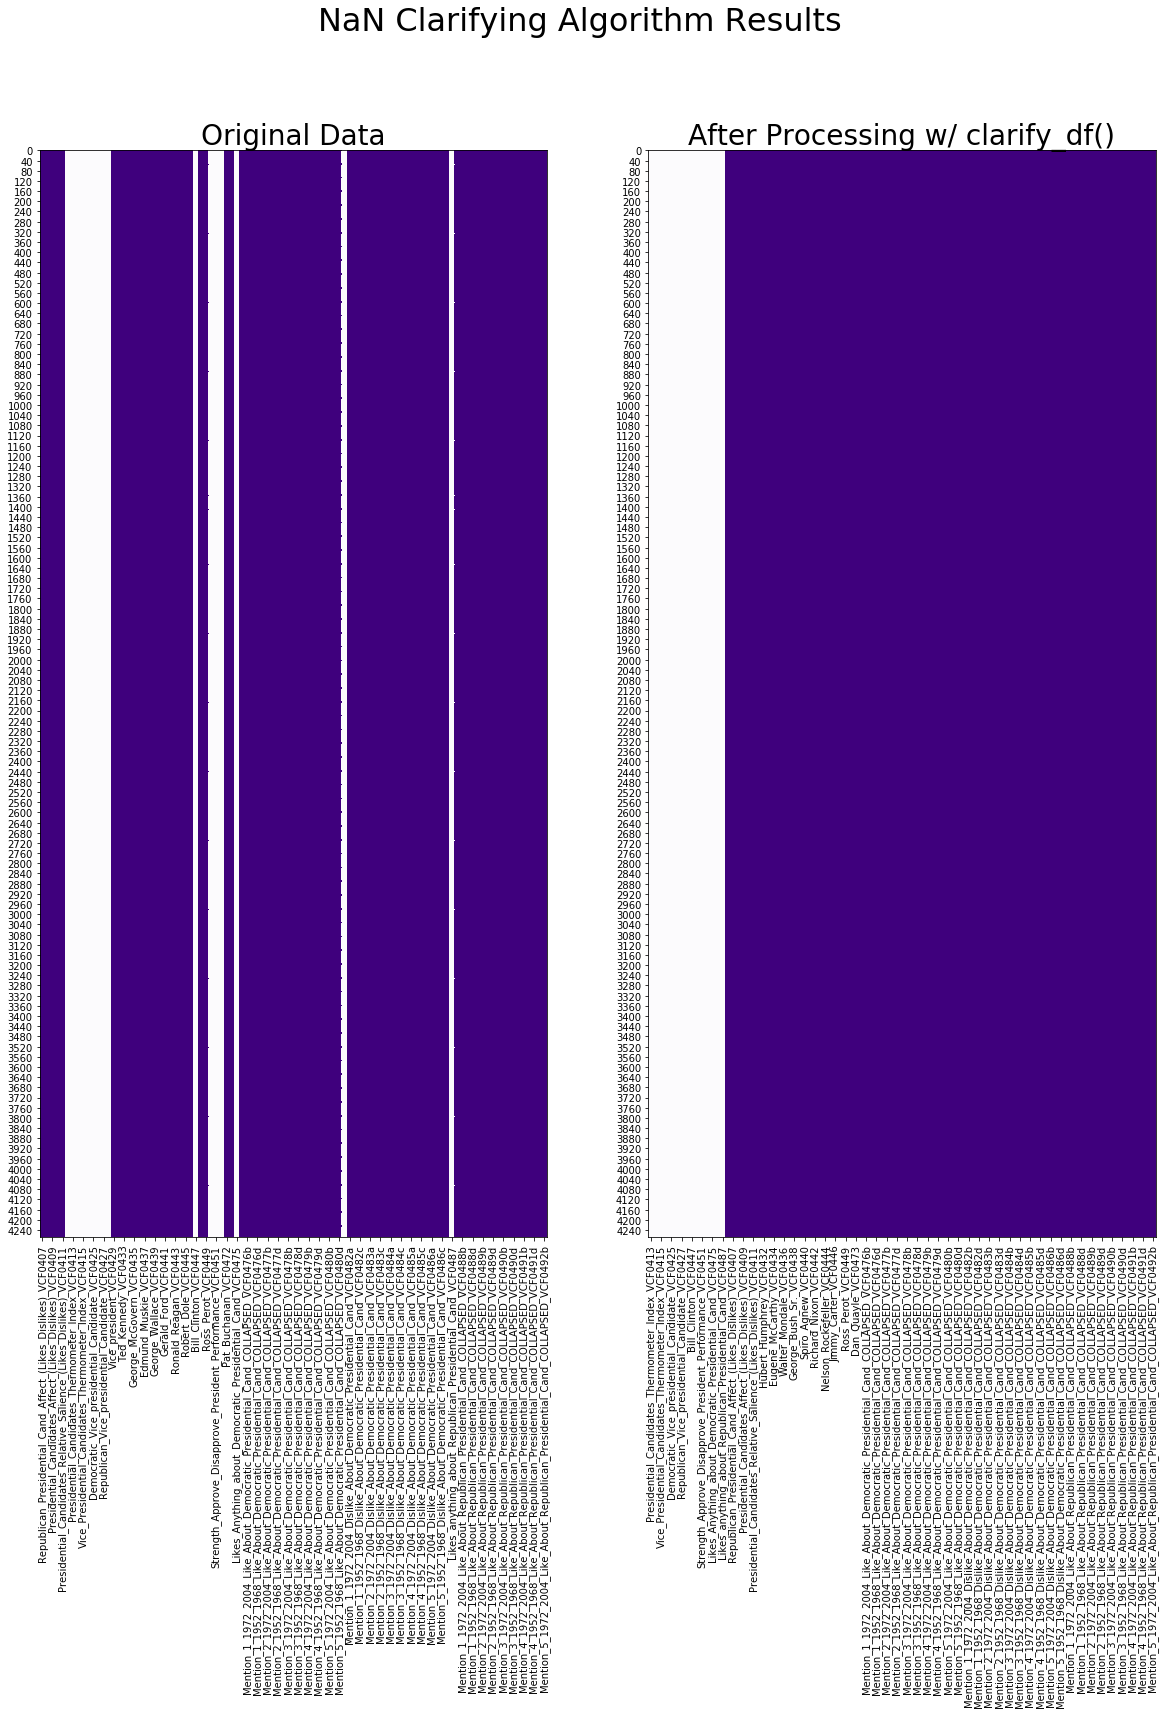

In [30]:
iter_4 = clarify_df(data_2.iloc[:,300:400], heatmap=True)

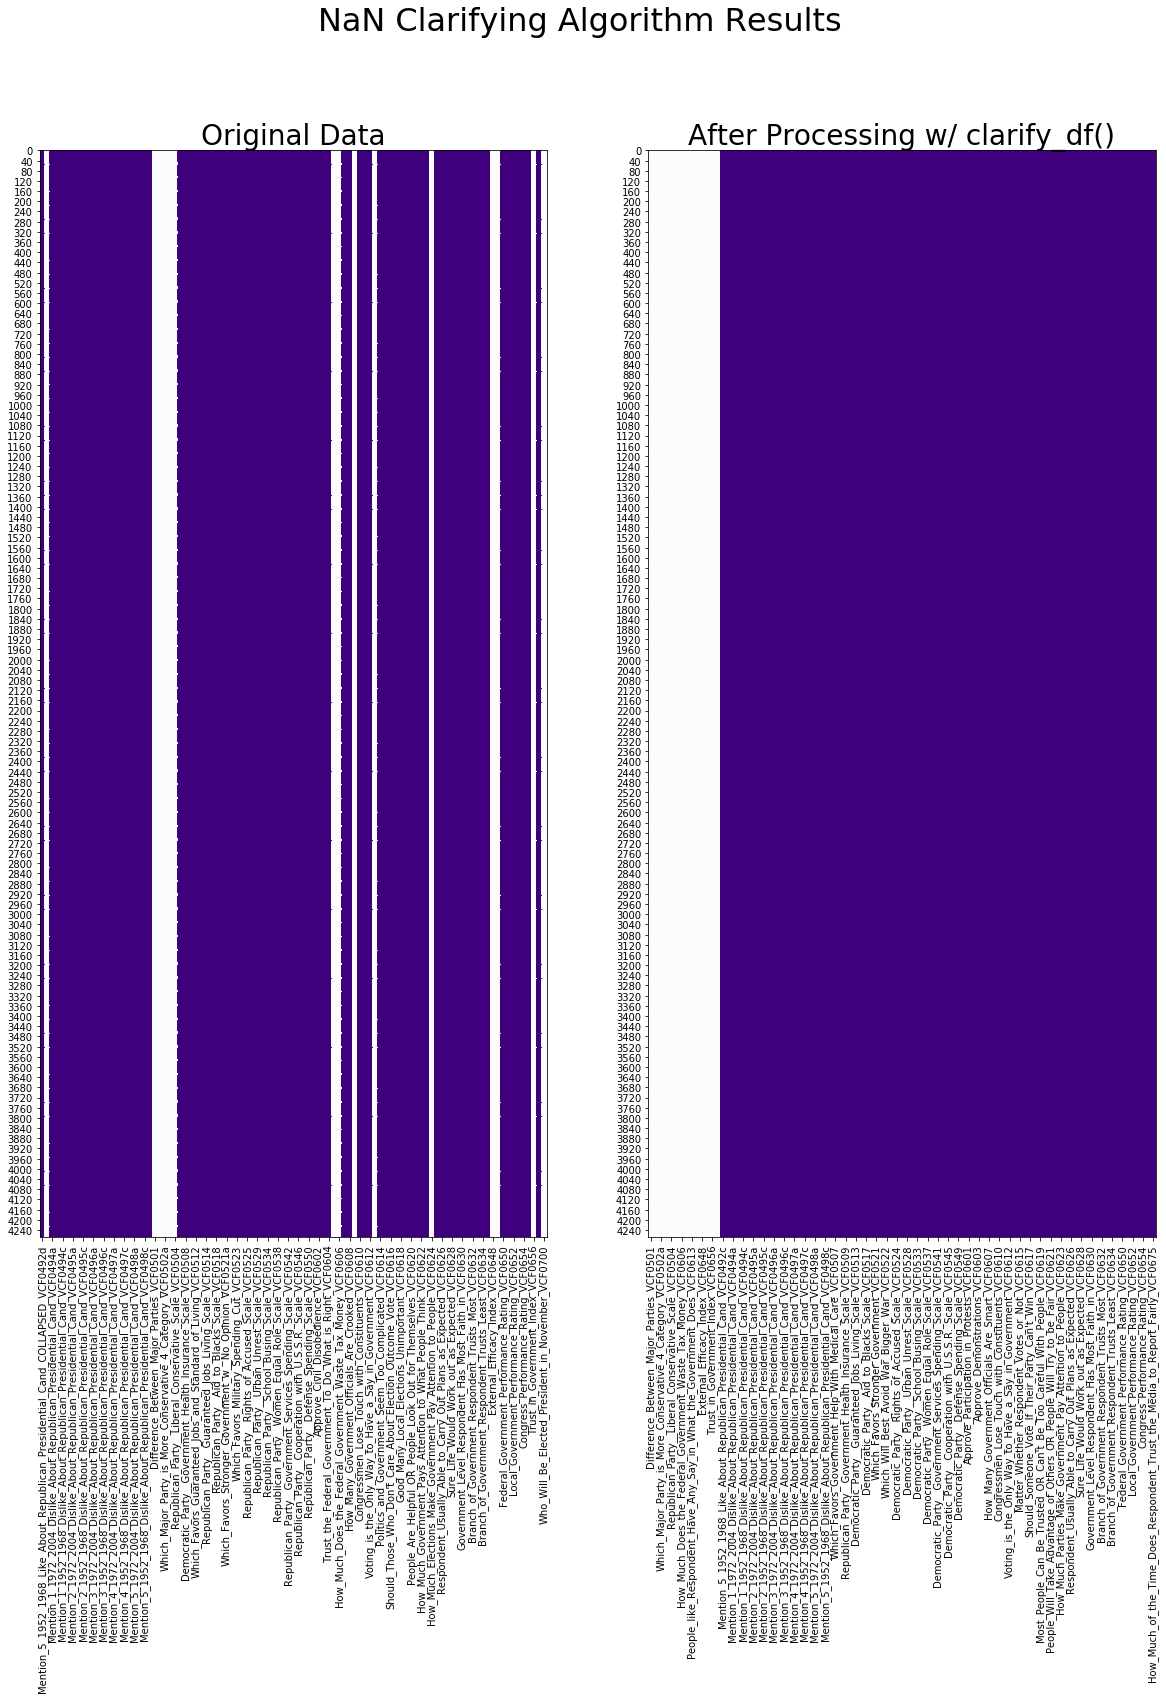

In [33]:
iter_5 = clarify_df(data_2.iloc[:,400:500], heatmap=True)

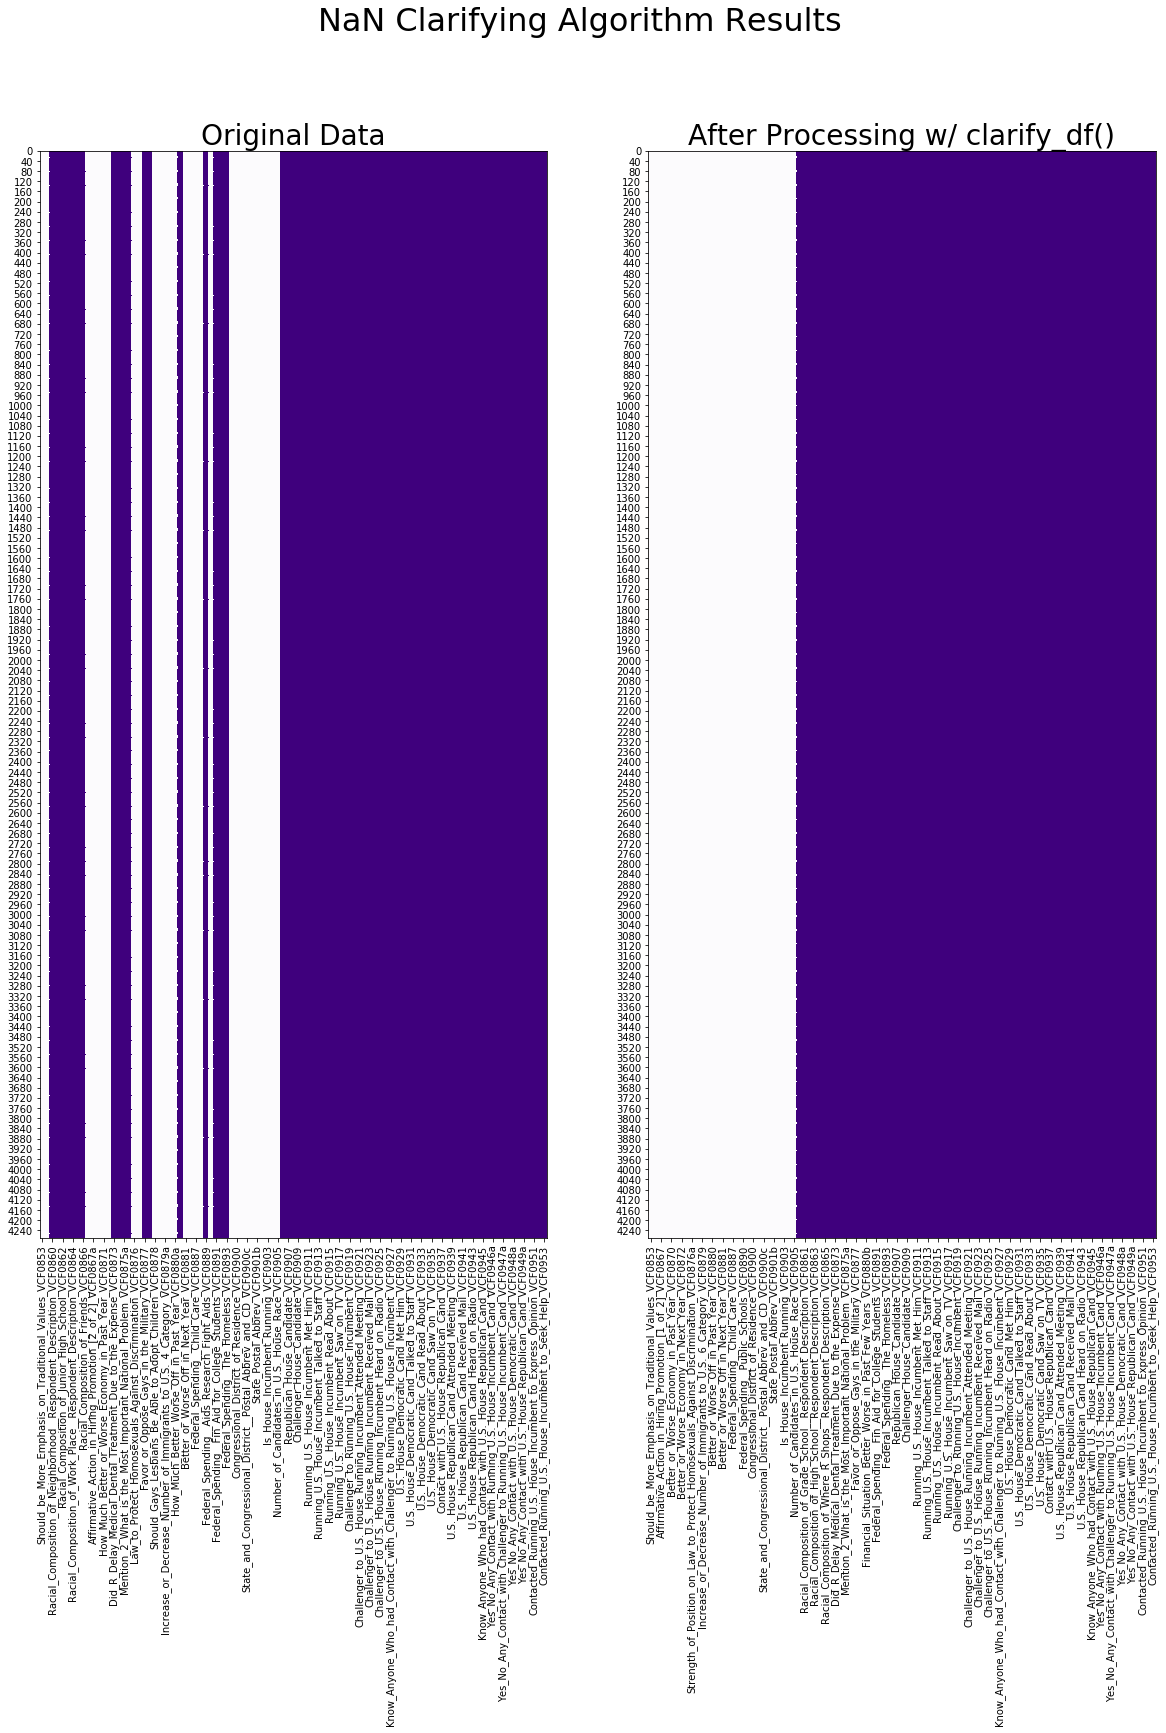

In [34]:
iter_6 = clarify_df(data_2.iloc[:,600:700], heatmap=True)

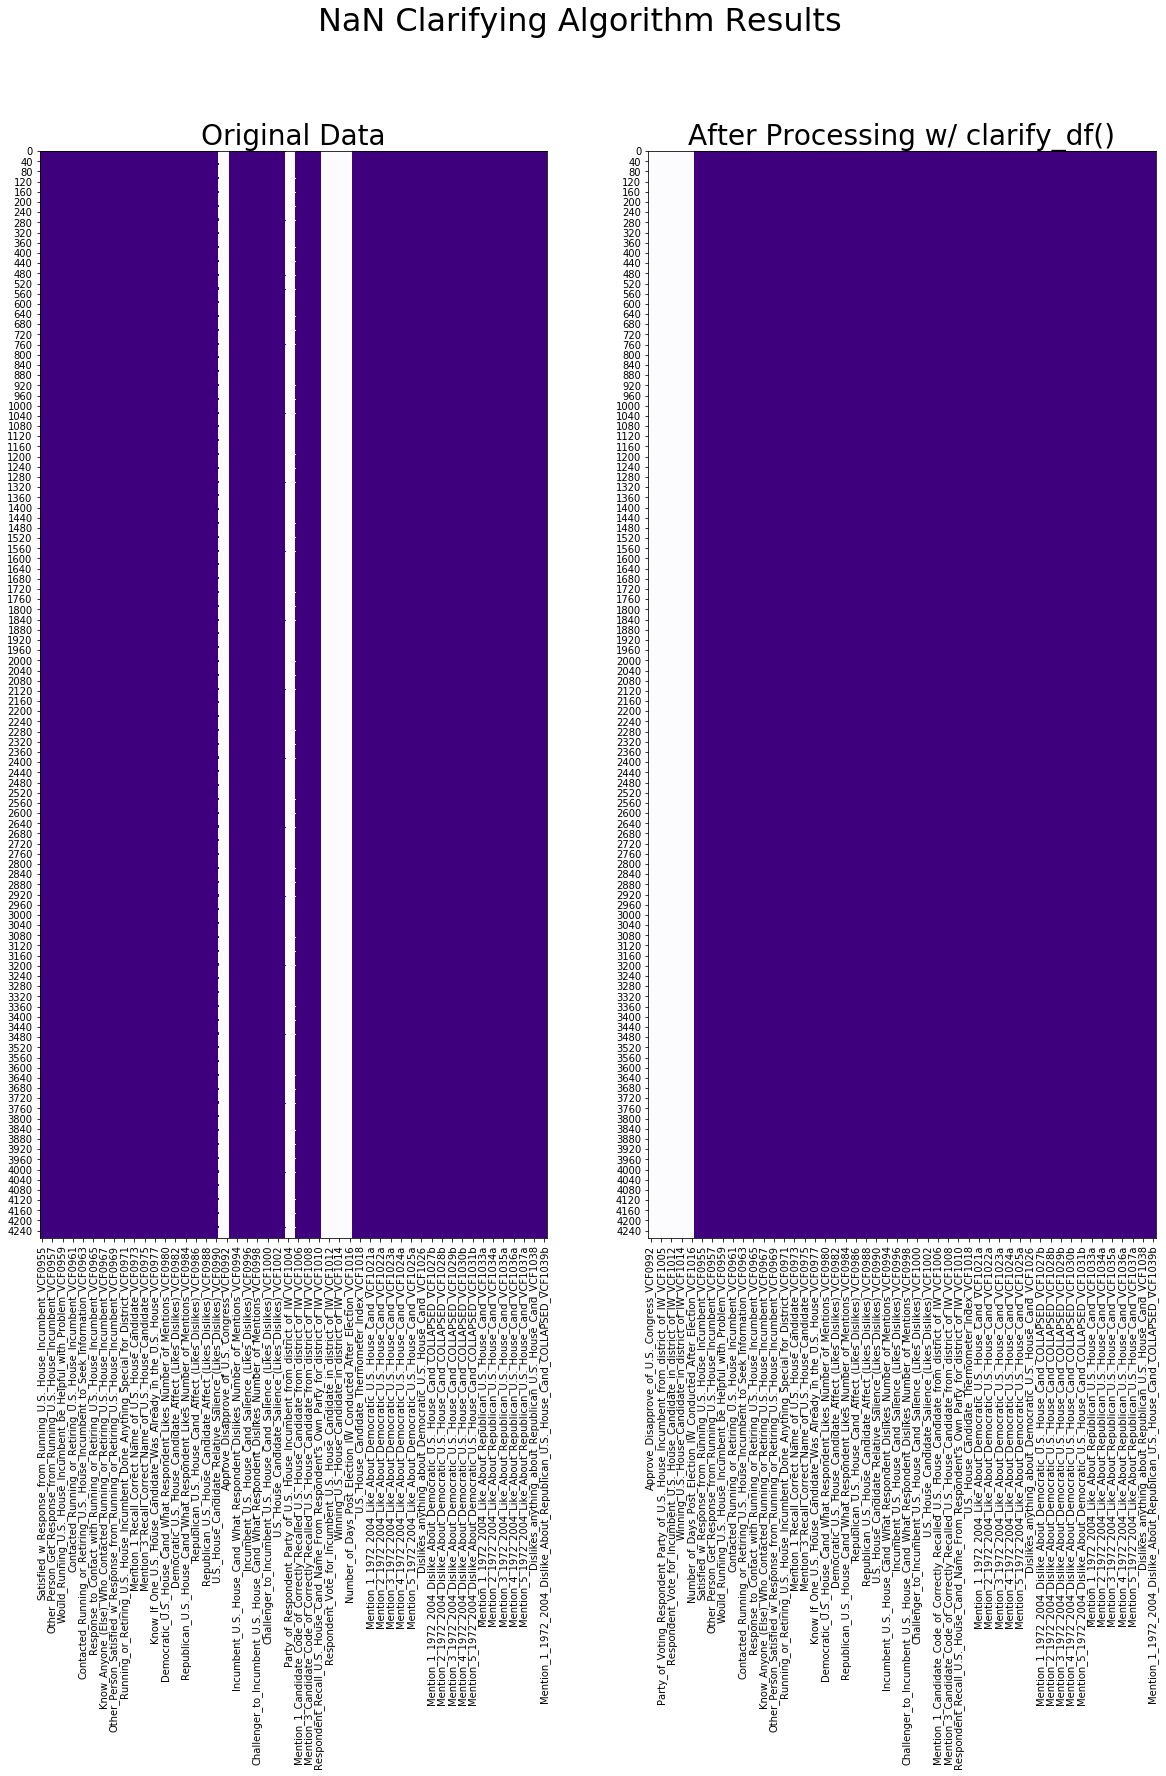

In [36]:
iter_7 = clarify_df(data_2.iloc[:,700:800], heatmap=True)

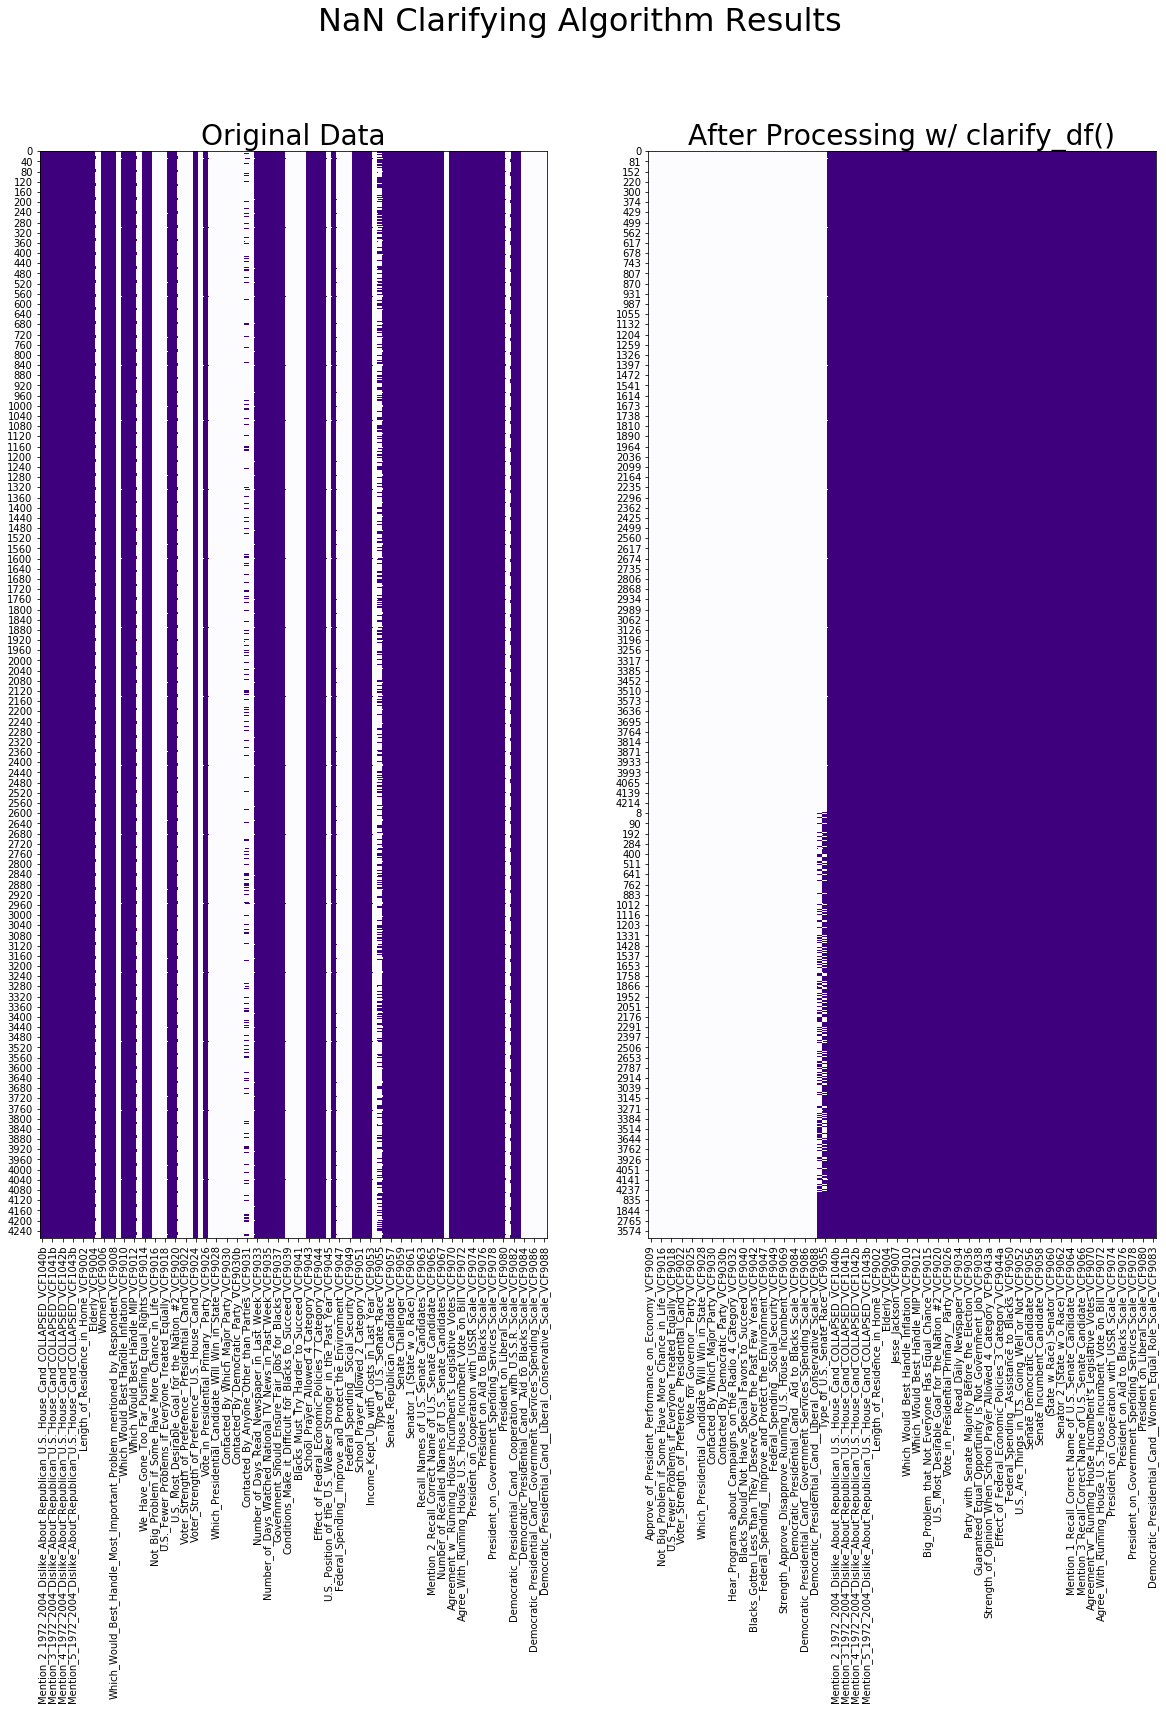

In [37]:
iter_8 = clarify_df(data_2.iloc[:,800:900], heatmap=True)

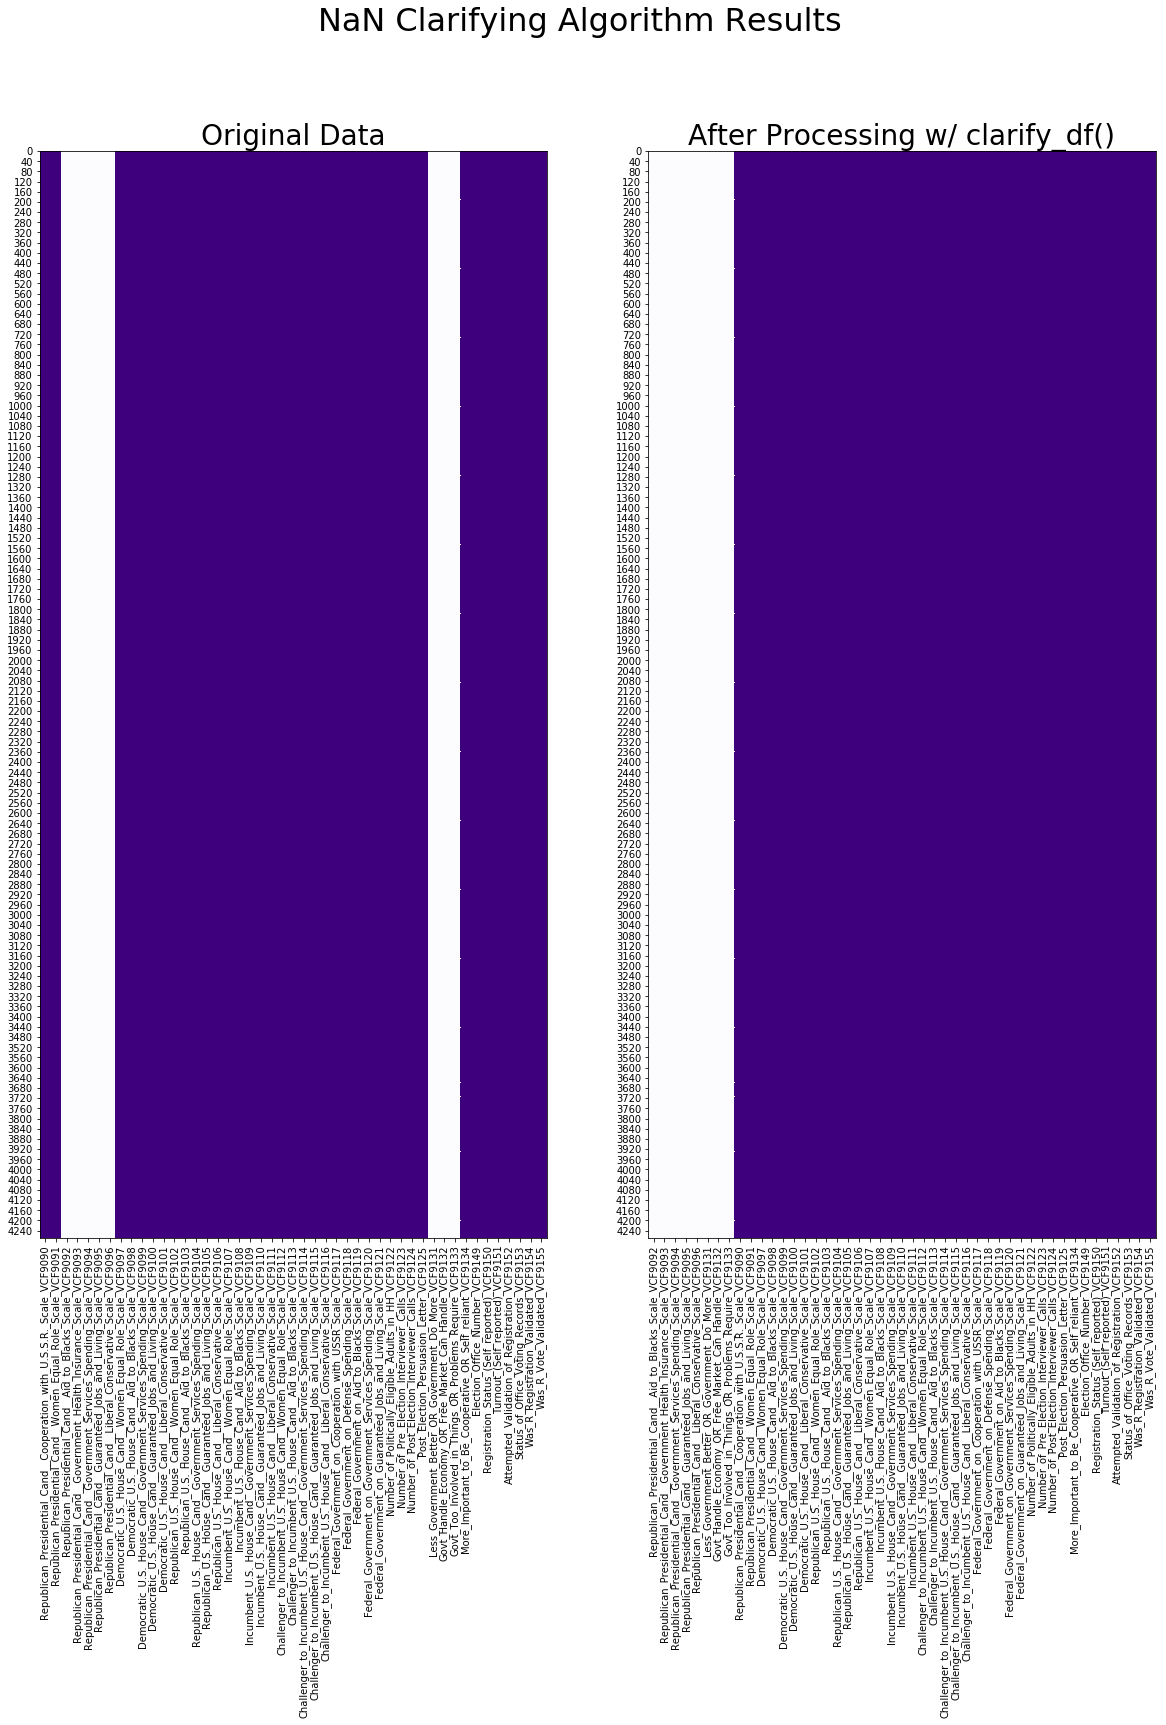

In [39]:
iter_9 = clarify_df(data_2.iloc[:,900:], heatmap=True)

In [44]:
data_3 = data_2.copy()

In [45]:
data_3.shape

(4270, 948)

In [46]:
data_4 = data_3.dropna(axis=1)

In [47]:
data_4.shape

(4270, 251)

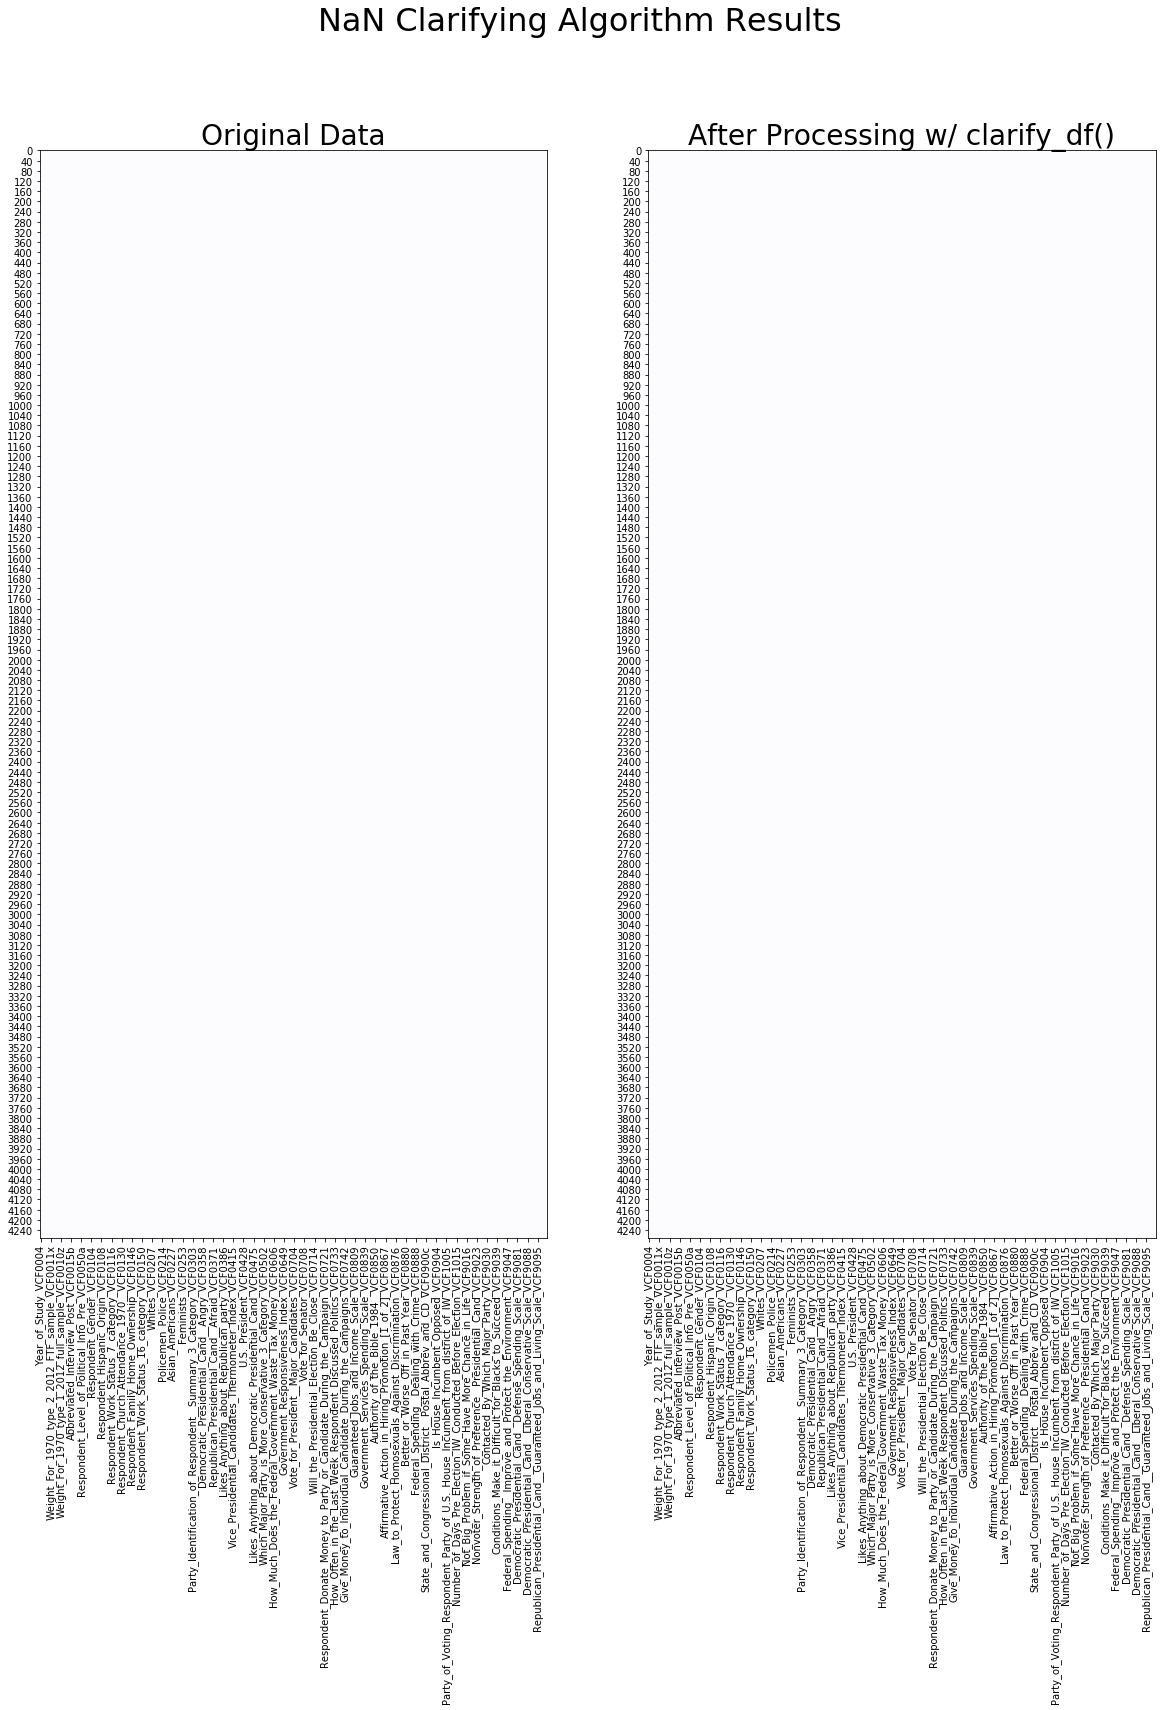

In [48]:
iter_10 = clarify_df(data_4.iloc[:,:], heatmap=True)

In [49]:
iter_10.to_pickle('./pickles/anes_2016_NAN_Free.pkl')

In [51]:
for i in iter_10.columns:
    print(i)

Version
Year_of_Study_VCF0004
Study_Respondent_Number_Year_level_Case_ID_VCF0006
Unique_Respondent_Number_(Cross_year_ID_for_panel_cases)_VCF0006a
Weight_For_1970_type_0_2012_FTF_sample_VCF0009x
Weight_For_1970_type_1_2012_FTF_sample_VCF0010x
Weight_For_1970_type_2_2012_FTF_sample_VCF0011x
Weight_For_1970_type_0_2012_Web_sample_VCF0009y
Weight_For_1970_type_1_2012_Web_sample_VCF0010y
Weight_For_1970_type_2_2012_Web_sample_VCF0011y
Weight_For_1970_type_0_2012_full_sample_VCF0009z
Weight_For_1970_type_1_2012_full_sample_VCF0010z
Weight_For_1970_type_2_2012_full_sample_VCF0011z
Completion_Pre_election_(flag)_VCF0013
Completion_Post_election_(flag)_VCF0014
Abbreviated_Interview_Pre_VCF0015a
Abbreviated_Interview_Post_VCF0015b
Cross_section_composition_fresh_Cross_or_panel_case_VCF0016
Mode_of_Interview_VCF0017
Language_of_Interview_Pre_VCF0018a
Language_of_Interview_Post_VCF0018b
Respondent_Level_of_Political_Info_Pre_VCF0050a
Respondent_Level_of_Political_Info_Post_VCF0050b
Respondent_Age